# Exploratory Data Analysis on Spotify Dataset

<div style="display:flex;padding-top:2rem">
    <img src="https://drive.google.com/uc?id=1PdXUq85PtWQO6VwZXQQhaAELORaAr40Y" width="425"/>
    <img src="https://drive.google.com/uc?id=1KjcEXBMbXQCGQEHh5f62OFRkmHFr7SVu" width="330"/>
</div>

The objective of this project is to analyze and explore the spotify dataset through different visualizations and answering interesting questions to get more insight about the dataset.

[Spotify](https://www.spotify.com) is a digital music service that gives you access to millions of songs.

The dataset is taken from https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

[opendatasets](https://github.com/JovianML/opendatasets#opendatasets) library is used to downlad and extract the dataset from kaggle. So let's install and import the required libraries.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks'

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: bhagyarajgohil
Your Kaggle Key: ········


  2%|▏         | 4.00M/195M [00:00<00:04, 41.1MB/s]

100%|██████████| 195M/195M [00:03<00:00, 58.5MB/s] 


The dataset has been downloaded and extracted.

In [4]:
data_dir = './spotify-dataset-19212020-160k-tracks'

In [5]:
import os
os.listdir(data_dir)

['tracks.csv',
 'artists.csv',
 'dict_artists.json',
 'data_by_year_o.csv',
 'data_by_artist_o.csv',
 'data_o.csv',
 'data_by_genres_o.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "exploratory-data-analysis-on-spotify-dataset"

In [7]:
import jovian

In [ ]:
jovian.commit(project=project_name)

## Data Preparation and Cleaning

Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. we will use it to load and prepare the dataset.

In [8]:
import pandas as pd

In [9]:
tracks_raw_df = pd.read_csv(data_dir + '/tracks.csv')

In [10]:
tracks_raw_df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


The `tracks` dataframe contains 20 columns. We will be using only the following selected columns:

In [11]:
selected_columns = [
    'name',
    'popularity',
    'duration_ms',
    'explicit',
    'artists',
    'release_date',
    # audio features of the track
    'danceability',
    'energy',
    'loudness',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo'
]

In [12]:
len(selected_columns)

15

We have selected a total of 15 columns. Let's copy these columns to a seperate dataframe for further processing.

In [13]:
tracks_df = tracks_raw_df[selected_columns].copy()

In [14]:
tracks_df

,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Carve,6,126903,0,['Uli'],1922-02-22,0.645,0.4450,-13.338,0.4510,0.674,0.744000,0.1510,0.1270,104.851
1,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],1922-06-01,0.695,0.2630,-22.136,0.9570,0.797,0.000000,0.1480,0.6550,102.009
2,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],1922-03-21,0.434,0.1770,-21.180,0.0512,0.994,0.021800,0.2120,0.4570,130.418
3,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],1922-03-21,0.321,0.0946,-27.961,0.0504,0.995,0.918000,0.1040,0.3970,169.980
4,Lady of the Evening,0,163080,0,['Dick Haymes'],1922,0.402,0.1580,-16.900,0.0390,0.989,0.130000,0.3110,0.1960,103.220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,云与海,50,258267,0,['阿YueYue'],2020-09-26,0.560,0.5180,-7.471,0.0292,0.785,0.000000,0.0648,0.2110,131.896
586668,blind,72,153293,0,['ROLE MODEL'],2020-10-21,0.765,0.6630,-5.223,0.0652,0.141,0.000297,0.0924,0.6860,150.091
586669,What They'll Say About Us,70,187601,0,['FINNEAS'],2020-09-02,0.535,0.3140,-12.823,0.0408,0.895,0.000150,0.0874,0.0663,145.095
586670,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']",2021-03-05,0.696,0.6150,-6.212,0.0345,0.206,0.000003,0.3050,0.4380,90.029


In [15]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              586601 non-null  object 
 1   popularity        586672 non-null  int64  
 2   duration_ms       586672 non-null  int64  
 3   explicit          586672 non-null  int64  
 4   artists           586672 non-null  object 
 5   release_date      586672 non-null  object 
 6   danceability      586672 non-null  float64
 7   energy            586672 non-null  float64
 8   loudness          586672 non-null  float64
 9   speechiness       586672 non-null  float64
 10  acousticness      586672 non-null  float64
 11  instrumentalness  586672 non-null  float64
 12  liveness          586672 non-null  float64
 13  valence           586672 non-null  float64
 14  tempo             586672 non-null  float64
dtypes: float64(9), int64(3), object(3)
memory usage: 67.1+ MB


In [16]:
tracks_df.sample(10)

,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
287905,Gremisame Ta Onira,11,149000,0,['Stratos Dionisiou'],1969-11-11,0.702,0.592,-9.200,0.0553,0.34500,0.000006,0.3240,0.6770,123.585
543920,Good Good Lovin',23,164000,0,['Bobby Hebb'],1966-01-01,0.621,0.279,-11.752,0.0305,0.73000,0.000000,0.1100,0.6990,81.535
208712,El Loco,30,209320,0,['Mac Salvador'],2001-09-25,0.712,0.522,-8.004,0.0436,0.81500,0.000295,0.1430,0.5440,80.029
534910,Má Dívka 'N',24,127667,0,['Pavel Bobek'],2003-07-28,0.556,0.546,-8.379,0.0268,0.04580,0.000947,0.6530,0.7290,100.167
124630,"Piano Concerto No. 1 in D Minor, Op. 15: I. Ma...",0,1183880,0,"['Johannes Brahms', 'Gary Graffman', 'Charles ...",1951,0.270,0.190,-16.015,0.0336,0.98600,0.901000,0.1470,0.0615,97.081
175008,Miten kävikään,25,172600,0,['Aste'],2009-06-01,0.652,0.855,-5.623,0.1070,0.00081,0.000000,0.1270,0.8630,130.044
475203,Diez Días Después,37,224213,0,['Airbag'],2011-05-01,0.425,0.568,-4.091,0.0308,0.72200,0.000018,0.1370,0.2030,136.003
524744,Pani Pani Re,26,306987,0,"['Vishal Bhardwaj', 'Lata Mangeshkar']",1996,0.537,0.437,-9.681,0.0440,0.81500,0.002610,0.9660,0.2390,80.985
53200,003 - und der Karpatenhund - Teil 02,41,73013,0,['Die drei ???'],1979-01-03,0.707,0.367,-16.670,0.9350,0.39700,0.000000,0.5500,0.6160,125.656
380729,Running Low,35,201498,0,"['Netsky', 'Beth Ditto']",2014-06-16,0.315,0.819,-3.945,0.0625,0.00587,0.001150,0.0896,0.2330,173.038


The `release_date` column contains the date on which the song was released but the it seems to be inconsistent. In many entries the column only contains the year of release.
To keep the data consistent we will add a new column named `Year` containing only the release year of the song.

In [17]:
def to_year(x):
    result = []
    x.to_string()
    for i in x:
        result.append(int(i[:4]))
    return result

tracks_df['year'] = to_year(tracks_df.release_date)

As the fomrat of the date in release_date column is `year-month-day` or `year`, we will extract the first 4 digits as year with the help of above function.

In [18]:
tracks_df

,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year
0,Carve,6,126903,0,['Uli'],1922-02-22,0.645,0.4450,-13.338,0.4510,0.674,0.744000,0.1510,0.1270,104.851,1922
1,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],1922-06-01,0.695,0.2630,-22.136,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1922
2,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],1922-03-21,0.434,0.1770,-21.180,0.0512,0.994,0.021800,0.2120,0.4570,130.418,1922
3,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],1922-03-21,0.321,0.0946,-27.961,0.0504,0.995,0.918000,0.1040,0.3970,169.980,1922
4,Lady of the Evening,0,163080,0,['Dick Haymes'],1922,0.402,0.1580,-16.900,0.0390,0.989,0.130000,0.3110,0.1960,103.220,1922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,云与海,50,258267,0,['阿YueYue'],2020-09-26,0.560,0.5180,-7.471,0.0292,0.785,0.000000,0.0648,0.2110,131.896,2020
586668,blind,72,153293,0,['ROLE MODEL'],2020-10-21,0.765,0.6630,-5.223,0.0652,0.141,0.000297,0.0924,0.6860,150.091,2020
586669,What They'll Say About Us,70,187601,0,['FINNEAS'],2020-09-02,0.535,0.3140,-12.823,0.0408,0.895,0.000150,0.0874,0.0663,145.095,2020
586670,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']",2021-03-05,0.696,0.6150,-6.212,0.0345,0.206,0.000003,0.3050,0.4380,90.029,2021


Siimilarly, we will load and process the `artists` dataset.

In [19]:
artists_raw_df = pd.read_csv(data_dir + '/artists.csv')

In [20]:
artists_raw_df.sample(10)

,id,followers,genres,name,popularity
501352,2D1XqGRdLf5Zl1LSiQrKP1,17.0,[],Dubanista,0
832778,0jY68A8oxFInF6MeghIOmB,510.0,[],Code3000,16
208158,13NhdveBzN2Yh2elbf1rLs,15302.0,"['dub techno', 'microhouse', 'minimal tech hou...",Pablo Bolivar,40
880071,0VnsN1DuwdxvTLlVDV14Eb,46.0,[],Quentin Dourthe,16
668345,7JQrF5fW8Q27NP24y1IGon,18.0,[],Arc Charger,0
846104,6vBm0kFy8xndqPZRY8zpYw,600.0,['smooth soul'],The Sound Principle,7
795427,5n6Gg4L0TweFi6ukr9nTyK,24.0,[],Nikolitsa Boutieros,0
335223,2k0B4vA1DIeC3uPXOwObZj,6.0,[],Original Sign,0
277179,6HTnXVZSdGiKN2MF51hpP5,7787.0,"['black metal', 'black noise', 'swedish black ...",Abruptum,17
773227,1CDetnY6jXZsE1E9dM3T9G,111.0,[],Multielásticos,4


In [21]:
artists_df = artists_raw_df[['name', 'followers', 'genres', 'popularity']].copy()

In [22]:
artists_df.sample(10)

,name,followers,genres,popularity
540882,Colin Devlin,505.0,[],7
1041495,Banjo Homme,54.0,[],3
464906,Ayu Laksmi,332.0,[],14
634808,Chen Han Wei,53.0,['singaporean mandopop'],12
1086621,Chantal Acda,2428.0,['belgian indie'],30
1036854,Sean Riddick,6.0,[],0
632137,Shmirlap,368.0,['acidcore'],6
471783,Zorgones,28.0,[],1
387532,Clarence And Gwen Foster Ashley,0.0,[],0
822162,The Lancelot,325.0,['beach house'],31


In [23]:
artists_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104349 entries, 0 to 1104348
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   name        1104349 non-null  object 
 1   followers   1104336 non-null  float64
 2   genres      1104349 non-null  object 
 3   popularity  1104349 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 33.7+ MB


In [24]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


## Exploratory Analysis and Visualization

Before we ask questions about the dataset, let's explore the different factors and see if we can come up with any interseting insights.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [25]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Number of Songs
First let's look at the number of songs every year in the dataset.

In [26]:
yearwise_tracks_df = tracks_df.groupby('year')['name'].count()
yearwise_tracks_df

year
1900        1
1922      276
1923      657
1924      633
1925      903
        ...  
2017     9889
2018    10936
2019    11907
2020    13937
2021     6281
Name: name, Length: 101, dtype: int64

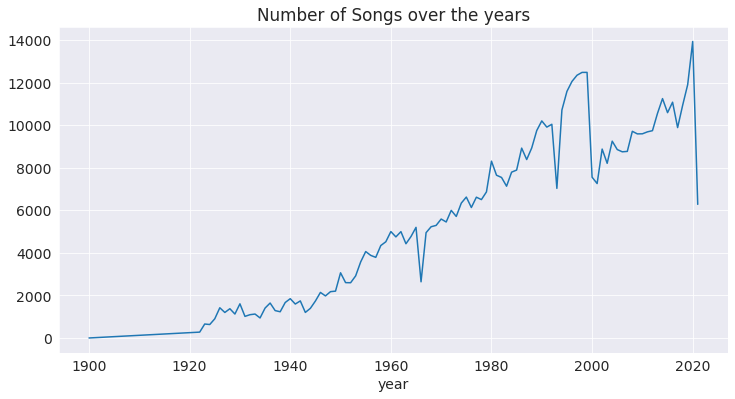

In [27]:
plt.title('Number of Songs over the years')
sns.lineplot(x=yearwise_tracks_df.index, y=yearwise_tracks_df.values);

From the line graph it is clear that the number of songs every year has been increasing overall.
Note that there is a sudden decrease in number of songs after `2020`, it is because the dataset contains the songs only upto April 2021.
We sould also keep in mind that the number of songs in the dataset depends on the data collection methodology used by the author of the dataset.

## Genres
Now, lets look at the different genres of the songs.

In [28]:
artists_df["genres"] = artists_df["genres"].apply(eval)

def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

top_genres = to_1D(artists_df.genres).value_counts().head(15)
top_genres

dance pop                572
pop                      568
rock                     564
electro house            558
classical performance    502
latin                    498
indie rock               485
hip hop                  484
pop rap                  467
rap                      461
edm                      460
electropop               458
french hip hop           452
latin rock               446
modern rock              444
dtype: int64

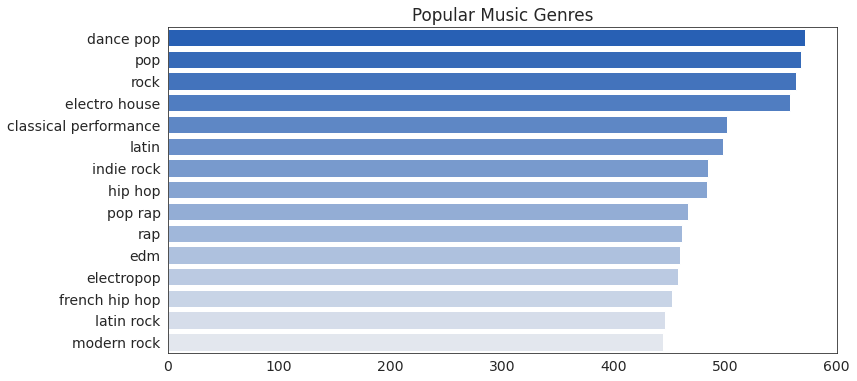

In [29]:
#color palette
color_cmap = sns.light_palette("#0352c9", as_cmap=True)
import matplotlib.cm
matplotlib.cm.register_cmap('color_map', color_cmap)
color_pal = sns.color_palette('color_map', 15)
color_pal.reverse()

with sns.axes_style('white'):
    plt.title('Popular Music Genres')
    sns.barplot(x=top_genres.values, y=top_genres.index, palette=color_pal);

From the graph it is evident that `pop`, `rock` and `electo house` genres have the most number of artists associated with them.

## Advisory label
Certain songs have parental advisory label associated with them indicating the song contains adult content which may not be suitable for children. Let's see how many songs in the dataset have advisory label associated with them.

In [30]:
tracks_df.explicit.value_counts()

0    560808
1     25864
Name: explicit, dtype: int64

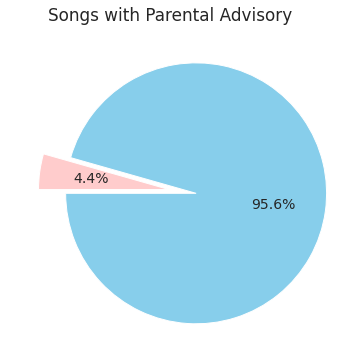

In [31]:
plt.title('Songs with Parental Advisory')
plt.pie(tracks_df.explicit.value_counts(), 
        explode=(0.2, 0.01), 
        colors=['skyblue','#ffcccc'], 
        autopct='%1.1f%%', 
        startangle=180);

Around `~4.4%` of songs in the dataset have advisory label associated with them.

## Time Duration
The `duration_ms` column of the `tracks` dataframe contains the time duration of the song in milliseconds. Let's visualize it's ditribution.

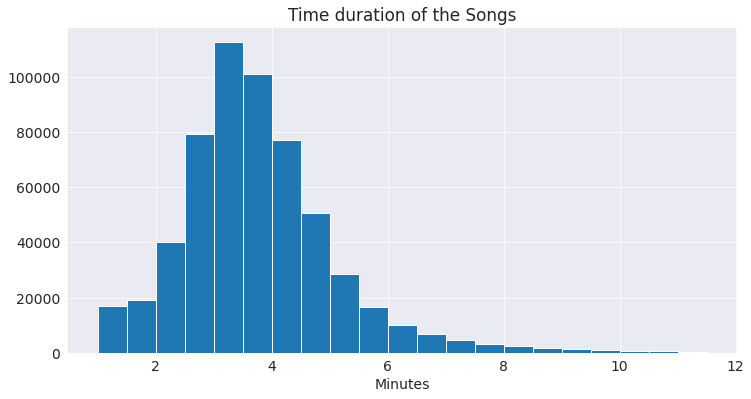

In [32]:
plt.title('Time duration of the Songs')
plt.xlabel('Minutes')
#converting milliseconds to minutes
plt.hist(tracks_df.duration_ms / (1000 * 60), bins=np.arange(1,12,0.5));

Most songs seem to be between `3` to `4` mintues long.

## Audio Features
The songs have certain audio features associated with them. Let's understand what they mean and what correaltion they have with each other.

- `danceability` : Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- `energy` : Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
- `loudness` : The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks.
- `speechiness` : Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
- `acousticness` : A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- `instrumentalness` : Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
- `liveness` : Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
- `valence` : A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive, while tracks with low valence sound more negative.
- `tempo` : The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

In [33]:
tracks_df.describe()

,popularity,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,-10.206067,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,1988.566168
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,5.089328,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,22.831283
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,-12.891000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,1974.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,-9.243000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,1992.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,-6.482000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,2007.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,5.376000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,2021.000000


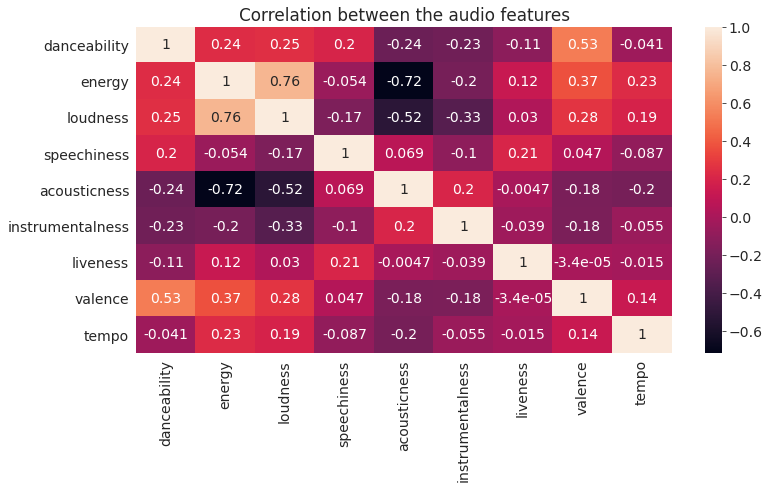

In [34]:
corr = tracks_df[['danceability', 
                  'energy', 
                  'loudness', 
                  'speechiness', 
                  'acousticness', 
                  'instrumentalness', 
                  'liveness',
                  'valence', 
                  'tempo' ]].corr()

plt.title('Correlation between the audio features')
sns.heatmap(corr, annot=True);

The following observations can be made from the above heatmap:
- There is a strong positive correlation between energy and loudness.
- Also there is a positive correlation between valence and danceablity.
- There seems to be strong negative correlation between acousticness and energy.

Let us save and upload our work to Jovian before continuing

In [35]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


## Asking and Answering Questions

Now, let's ask and answer some interesting questions about the dataset.

### Q: Which are the most Danceable tracks ?

In [3]:
most_danceable_tracks = tracks_df.sort_values('danceability', ascending=False).head(5)
most_danceable_tracks

,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year
418558,Puisorul cafeniu,15,84707,0,['Malina Olinescu'],2002-01-01,0.991,0.422,-11.093,0.2470,0.307000,0.017600,0.0788,0.994,119.975,2002
156664,Who Loves The Sun feat. Jo.Ke - Edit,53,256996,0,"['Nu', 'Jo.Ke']",2011-07-12,0.988,0.644,-10.245,0.0720,0.118000,0.462000,0.2440,0.499,120.003,2011
252256,Tío Mario,11,101760,0,['Susana Bosch'],1998-07-01,0.988,0.459,-6.631,0.1300,0.124000,0.000000,0.0749,0.930,114.849,1998
62569,Funky Cold Medina,58,248160,0,['Tone-Loc'],1989-01-01,0.988,0.633,-15.012,0.0888,0.075500,0.000002,0.0668,0.929,117.493,1989
356102,Cool - Leonardo La Mark Remix,0,361967,0,"['Spooner Street', 'Rio Dela Duna', 'Leonardo ...",2021-01-15,0.987,0.649,-6.727,0.2770,0.000626,0.379000,0.0686,0.458,122.002,2021


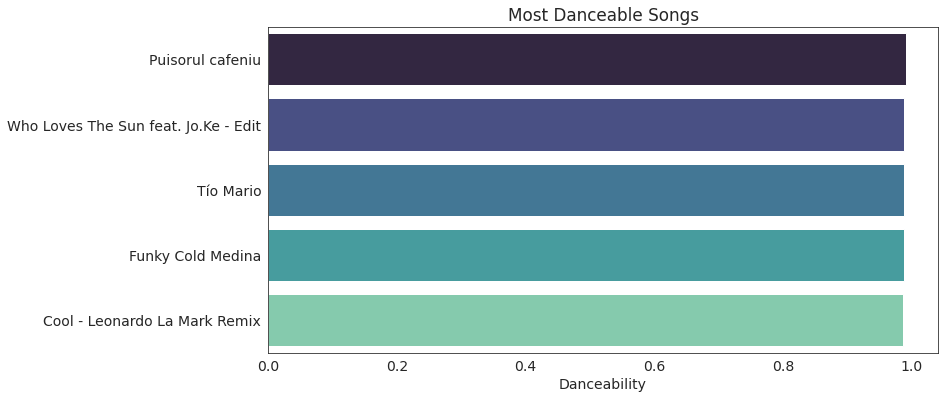

In [6]:
with sns.axes_style('white'):
    plt.title('Most Danceable Songs')
    sns.barplot(x='danceability', y='name', palette='mako', data=most_danceable_tracks)
    plt.xlabel('Danceability')
    plt.ylabel('');

### Q Who are the artists with most followers ?

In [2]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
top_artists = artists_df.sort_values('followers', ascending=False).head(10)
top_artists

,name,followers,genres,popularity
144138,Ed Sheeran,78900234.0,"['pop', 'uk pop']",92
144485,Ariana Grande,61301006.0,"['pop', 'post-teen pop']",95
313676,Drake,54416812.0,"['canadian hip hop', 'canadian pop', 'hip hop'...",98
144481,Justin Bieber,44606973.0,"['canadian pop', 'pop', 'post-teen pop']",100
144488,Eminem,43747833.0,"['detroit hip hop', 'hip hop', 'rap']",94
313508,Rihanna,42244011.0,"['barbadian pop', 'dance pop', 'pop', 'post-te...",92
126658,Billie Eilish,41792604.0,"['electropop', 'pop']",92
126338,Taylor Swift,38869193.0,"['pop', 'post-teen pop']",98
126339,Imagine Dragons,33665795.0,"['modern rock', 'rock']",89
144496,Queen,33483326.0,"['classic rock', 'glam rock', 'rock']",89


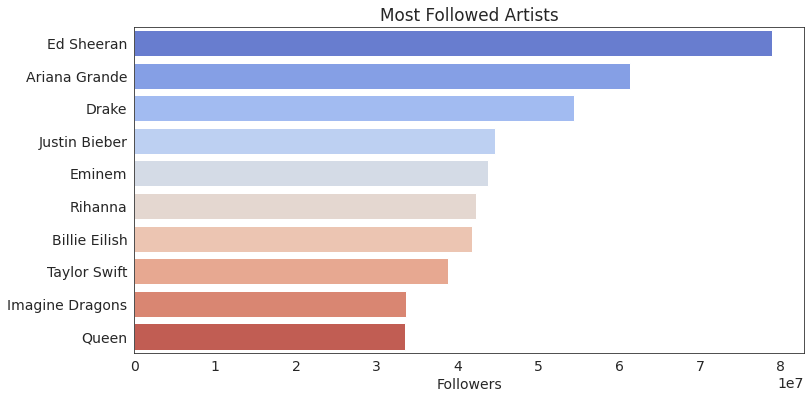

In [4]:
with sns.axes_style('white'):
    plt.title('Most Followed Artists')
    sns.barplot(x='followers', y='name', palette='coolwarm', data=top_artists)
    plt.xlabel('Followers')
    plt.ylabel('');

### Q: What are the song trends over time ?

In [16]:
yearwise_average = tracks_df.groupby('year')[['year',
                                              'danceability', 
                                              'energy', 
                                              'valence', 
                                              'instrumentalness', 
                                              'acousticness']].mean()[1:]
yearwise_average = yearwise_average.melt(id_vars='year')
yearwise_average

,year,variable,value
0,1922,danceability,0.533320
1,1923,danceability,0.637332
2,1924,danceability,0.593344
3,1925,danceability,0.617391
4,1926,danceability,0.622113
...,...,...,...
495,2017,acousticness,0.278547
496,2018,acousticness,0.278446
497,2019,acousticness,0.293902
498,2020,acousticness,0.271750


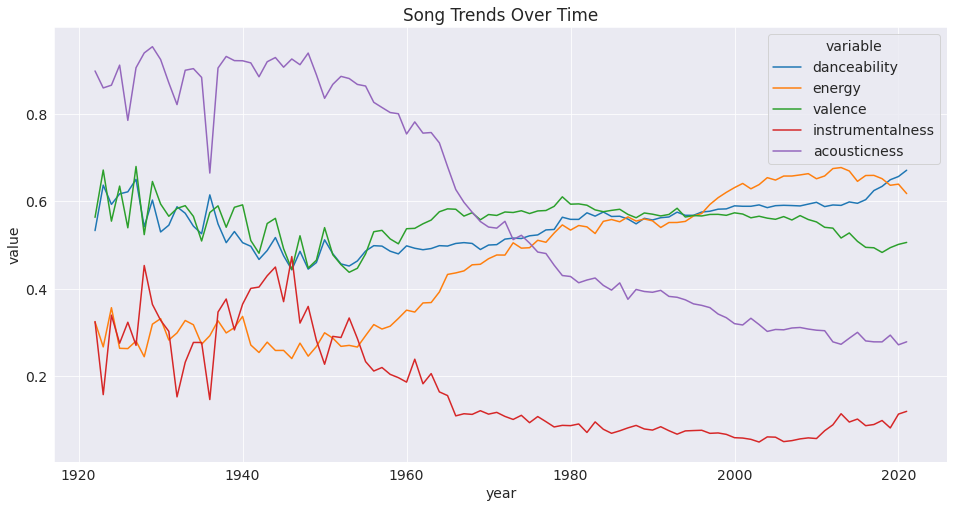

In [27]:
plt.figure(figsize=(16,8))
plt.title('Song Trends Over Time')
sns.lineplot(x='year', y='value', hue='variable', data=yearwise_average);

From the graph it is obserable that the overall `acousticness` has decreased and the `energy` has increased over time.

### Q: Which are some of the most Popular songs ?

Spotify Popularity is an extremely important value that Spotify uses internally to rank all artists and tracks on a scale from 0 to 100. Spotify Popularity gives you a valuable insight into how the Spotify algorithm currently evaluates the song.

In [4]:
popular_songs = tracks_df.sort_values('popularity', ascending=False).reset_index(drop=True).head(10)
popular_songs

,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year
0,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']",2021-03-19,0.677,0.696,-6.181,0.1190,0.32100,0.000000,0.4200,0.464,90.030,2021
1,drivers license,99,242014,1,['Olivia Rodrigo'],2021-01-08,0.585,0.436,-8.761,0.0601,0.72100,0.000013,0.1050,0.132,143.874,2021
2,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],2021-01-06,0.778,0.695,-6.865,0.0913,0.17500,0.000000,0.1500,0.472,149.996,2021
3,Save Your Tears,97,215627,1,['The Weeknd'],2020-03-20,0.680,0.826,-5.487,0.0309,0.02120,0.000012,0.5430,0.644,118.051,2020
4,telepatía,97,160191,0,['Kali Uchis'],2020-12-04,0.653,0.524,-9.016,0.0502,0.11200,0.000000,0.2030,0.553,83.970,2020
5,Leave The Door Open,96,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']",2021-03-05,0.586,0.616,-7.964,0.0324,0.18200,0.000000,0.0927,0.719,148.088,2021
6,Blinding Lights,96,200040,0,['The Weeknd'],2020-03-20,0.514,0.730,-5.934,0.0598,0.00146,0.000095,0.0897,0.334,171.005,2020
7,The Business,95,164000,0,['Tiësto'],2020-09-16,0.798,0.620,-7.079,0.2320,0.41400,0.019200,0.1120,0.235,120.031,2020
8,Heartbreak Anniversary,94,198371,0,['Giveon'],2020-03-27,0.449,0.465,-8.964,0.0791,0.52400,0.000001,0.3030,0.543,89.087,2020
9,Bandido,94,232853,0,"['Myke Towers', 'Juhn']",2020-12-10,0.713,0.617,-4.637,0.0887,0.12200,0.000000,0.0962,0.682,168.021,2020


It can be seen that the most popular songs as of `April, 2021` have a fairly recent release date i.e. in 2021 or 2020. Let's plot these popular songs using a horizontal bar chart.

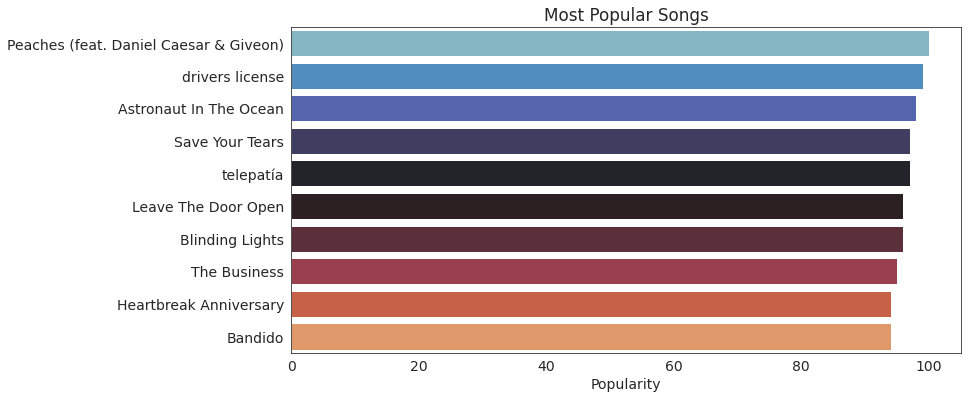

In [5]:
with sns.axes_style('white'):
    plt.title('Most Popular Songs')
    sns.barplot(x='popularity', y='name', palette='icefire', data=popular_songs)
    plt.xlabel('Popularity')
    plt.ylabel('');

### Q: What are the audio features of one of  the most Popular songs?

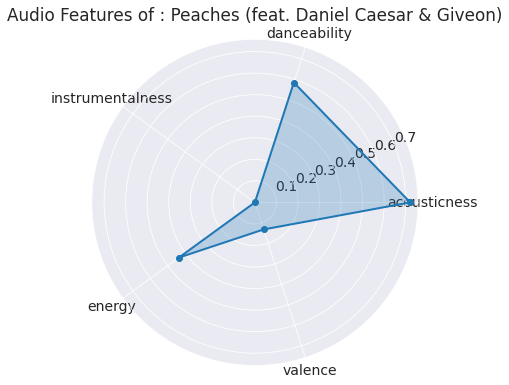

In [8]:
labels = np.array(['acousticness', 'danceability', 'instrumentalness', 'energy', 'valence'])
song = popular_songs.loc[1,labels].values
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
song = np.concatenate((song,[song[0]]))
angles = np.concatenate((angles,[angles[0]]))

#Radar Chart
fig=plt.show()
ax = plt.subplot(111, polar=True)
ax.plot(angles, song, 'o-', linewidth=2)
ax.fill(angles, song, alpha=0.25)
ax.set_thetagrids((angles * 180/np.pi)[0:5], labels)
ax.set_title('Audio Features of : ' + popular_songs.at[0,'name'])
ax.grid(True)

To learn more about the radar chart refer [this blog](https://www.kaggle.com/typewind/draw-a-radar-chart-with-python-in-a-simple-way)

### Q: Who are some of the most Popular artists ?
The popularity of the artist is between 0 and 100, with 100 being the most popular. The artist’s popularity is calculated from the popularity of all the artist’s tracks.

In [8]:
popular_artists = artists_df.sort_values('popularity', ascending=False).head(10)
popular_artists

,name,followers,genres,popularity
144481,Justin Bieber,44606973.0,"['canadian pop', 'pop', 'post-teen pop']",100
115489,Bad Bunny,32244734.0,"['latin', 'reggaeton', 'trap latino']",98
126338,Taylor Swift,38869193.0,"['pop', 'post-teen pop']",98
313676,Drake,54416812.0,"['canadian hip hop', 'canadian pop', 'hip hop'...",98
144484,BTS,31623813.0,"['k-pop', 'k-pop boy group']",96
115490,Juice WRLD,16996777.0,"['chicago rap', 'melodic rap']",96
144483,The Weeknd,31308207.0,"['canadian contemporary r&b', 'canadian pop', ...",96
144485,Ariana Grande,61301006.0,"['pop', 'post-teen pop']",95
144486,J Balvin,27286822.0,"['latin', 'reggaeton', 'reggaeton colombiano',...",95
115491,Myke Towers,5001808.0,['trap latino'],95


Few artists from the above list overlap with the artists in popular songs list. It is understandable as the artist's popularity is calculated based on the popularity of their songs.

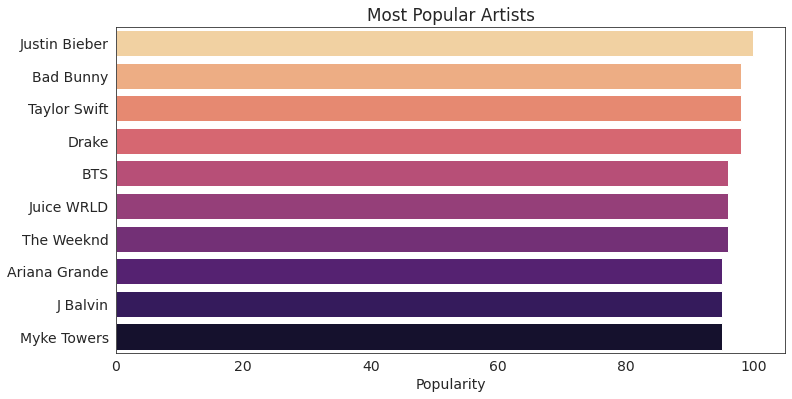

In [17]:
with sns.axes_style('white'):
    plt.title('Most Popular Artists')
    sns.barplot(x='popularity', y='name', palette='magma_r', data=popular_artists)
    plt.xlabel('Popularity')
    plt.ylabel('');

Let us save and upload our work to Jovian before continuing.

In [9]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "gohilbhagyaraj17/exploratory-data-analysis-on-spotify-dataset" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...


## Inferences and Conclusion

Here's a summary of few of the inferences from made from the dataset:
- There is an overall growth of the number of songs each year in the spotify database.
- `pop`, `rock` and `electro house` are some of the most popular genres with most number of artists asociated with them.
- Around `~4.4%` of songs in the dataset have advisory label associated with them.
- Majority of songs are around `3-4` minutes long.
- Spotify popularity is a value that Spotify uses internally to rank all artists and tracks on a scale from 0 to 100. It can be used to determine the most popular songs and artists in recent times.

## References and Future Work

References:
- Spotify Dataset : https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks
- Illustrations : https://undraw.co/illustrations
- [Dealing with List values in pandas dataframes](https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173)
- [A Practical Guide to Exploratory Data Analysis](https://towardsdatascience.com/a-practical-guide-to-exploratory-data-analysis-spotify-dataset-d8f703da663e)
- [Radar Chart](https://www.kaggle.com/typewind/draw-a-radar-chart-with-python-in-a-simple-way)

Future Work:
- A more in-depth analysis of spotify dataset for a specific year.
- Genre prediction of the song.
- Music Recommendation system.

In [1]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
